# TP: Spatial Linear Interference Cancellation

#### ___Adaptation of the Spatial ICMF via___
---

<img src=images/ICMF_via_LMS.png width='' height='' > </img>

So consider the adaptation of the spatial Interference Canceling Matched Filter (ICMF) depicted in the figure above, which in the spatial case is also called Generalized Sidelobe Canceller (Lecture 1, slides 61-63; see also the following slides on multi-user receivers). The received signal $y[k]$ contains $m$ subchannels and the interference canceling (IC) filter $\mathbf{f}$ is represented as a row vector. For a generic value of $\mathbf{f}$, we get the error signal

$$
\begin{equation}
e[k](\mathbf{f}) = d[k] - \mathbf{f} \mathbf{x}[k]
\end{equation}
$$

(the term ”epsilon” in Matlab is reserved for the precision of the Matlab implementation, hence do not use that for a variable name). For the adaptation of $\mathbf{f}$, the error signal is $\epsilon[k]$ which also provides an estimate of the transmitted symbol sequence $a[k]$ (up to a scale factor, which is $\|\mathbf{h}\|^2$ when $\mathbf{h}$ is known perfectly)), the desired response signal is $d[k]$, which is the spatial matched filter output $\mathbf{y}_1[k]$, and the input signal is $\mathbf{x}[k]$, which is also the output $\mathbf{y}_2[k]$ of the orthogonal complement filter $\mathbf{h}^{\perp H}$.

We shall consider the following signal scenario. The signal of interest is a QPSK signal, $a[k] = \frac{\sigma_a}{\sqrt(2)} (\pm 1 \pm j)$ of which the real and imaginary parts are generated as pseudorandom binary sequences. We shall use $\sigma_a$ to represent the propagation attenuation also. This signal gets received by a uniform linear array (ULA) so that $\mathbf{h} = \mathbf{a}(\theta)$ where the ULA response is of the form

$$
\begin{equation}
\mathbf{a}(\theta) = \begin{bmatrix}
       1 \\
       e^{j2\pi \frac{d}{\lambda} \sin(\theta)} \\[0.3em]
       \vdots \\
       e^{j(m-1)2\pi \frac{d}{\lambda} \sin(\theta)} \\[0.3em]
     \end{bmatrix}
\end{equation}
$$

where $\theta$ is the angle between the direction of arrival (DOA) and the normal to the ULA, $d$ is the spacing between the antennas and $\lambda$ is the wavelength. We shall take the classical choice $d = \frac{\lambda}{2}$ and we consider an array with $m = 4$ antennas.

The spatially colored noise consists of an interferer plus spatiotemporally white noise.
The interferer is also a digital communications signal with similar format as the signal of
interest. So for the interferer, a QPSK signal $b[k] = \frac{\sigma_b}{\sqrt(2)} (\pm 1 \pm j)$, independent from $a[k]$ passes through the channel $\mathbf{g} = e^{j\frac{\pi}{4}}\mathbf{a}(\phi)$ where $\phi$ is the DOA of the interferer, and $e^{j\frac{\pi}{4}}$ is a phase shift due to propagation. So the total received signal is of the form

$$
\begin{equation}
\overbrace{\mathbf{y}[k]}^{m \times 1}= \underbrace{\mathbf{h}}_{m \times 1} \; \underbrace{a[k]}_{1 \times 1} + \underbrace{\mathbf{g} \, b[k]+ \mathbf{u}[k]}_{\mathbf{v}[k]} = \underbrace{\mathbf{a}(\theta)}_{m \times 1} \; \underbrace{a[k]}_{1 \times 1} + \underbrace{\mathbf{a}(\phi)}_{m \times 1} \; \underbrace{e^{j\frac{\pi}{4}} b[k]}_{1 \times 1} + \underbrace{\mathbf{u}[k]}_{m \times 1}
\end{equation}
$$

where $\mathbf{u}[k]$ is the spatiotemporally white circular complex Gaussian noise with spectrum $\mathrm{S}_{\mathbf{uu}}(z) = \sigma_u^2 I_m$ (the real and imaginary parts of the components of the vector $\mathbf{u}[k]$ are independent white real Gaussian noises with zero mean and variance $\frac{\sigma_u^2}{2}$ ).

To simplify the scenario, we shall consider that the channels are constant during the
observation period. In the simulations, we can take $\sigma_a^2 = 1$. We can then determine $\sigma_b^2$ from Signal-to-Interference Ratio $SIR = 10 \log_{10} \frac{\sigma_a^2}{\sigma_b^2}$ (dB) and $\sigma_u^2$ from the (per antenna) Signal-to-Noise Ratio $SNR = 10 \log_{10} \frac{\sigma_a^2}{\sigma_u^2}$ (dB).

For the Interference Canceler (IC), even though for the given $\mathbf{h}$ all elements are of equal constant magnitude, which makes the choice for $\mathbf{h}^\perp$ less critical, we shall make the simple choice

$$
\begin{equation}
\mathbf{h}^{\perp H} = P_{\mathbf{h}}^{\perp H} = P_{\mathbf{h}}^{\perp} = I_m - \frac{\mathbf{h} \; \mathbf{h}^H}{\mathbf{h}^H\mathbf{h}} = I_m - \frac{1}{m} \mathbf{h} \; \mathbf{h}^H
\end{equation}
$$

where we exploited the fact that in this case $\|\mathbf{h}\|^2 = m$. With this choice of $\mathbf{h}^\perp$, the signal $\mathbf{y}_2[k]$ has a singular covariance matrix (due to the singularity of $P_{\mathbf{h}}^\perp$). This singularity may complicate some theoretical calculations, and affects the behavior of the LMS algorithm for the adaptation of $\mathbf{f}$ (which, like $\mathbf{y}_2[k]$, now has $m$ components, instead of $m−1$) in the long run. Nevertheless, the choice $\mathbf{h}^\perp = P_{\mathbf{h}}^\perp$ allows to treat all directions orthogonal to $\mathbf{h}$ in a balanced fashion. One issue is that the component of $\mathbf{\tilde{f}}[k]$ in the direction of $\mathbf{h}^H$ does not converge, it just remains constant: $\mathbf{\tilde{f}}[k]\mathbf{h} = \mathbf{\tilde{f}}[0]\mathbf{h}$. However, this is not a big problem, since the filter error $\mathbf{\tilde{f}}$ filters the signal $\mathbf{x}[k]$, which by construction has no component in the direction of $\mathbf{h}$. So the component of the error $\mathbf{\tilde{f}}$ in the direction of $\mathbf{h}^H$ does not lead to any error in the output $\mathbf{\tilde{f}}\mathbf{x}[k]$. Due to roundoff errors however, the component of the error $\mathbf{\tilde{f}}$ in the direction of $\mathbf{h}^H$ may actually drift away instead of stay constant. This problem gets avoided in practice if $\mathbf{h}$ varies in time and eventually occupies all directions.

Note that it may be an interesting exercise to compute the LMMSE filter $\mathbf{f}$ and associated MMSE for the particular scenario of $R_{\mathbf{vv}}$ appearing here (see HW1 also).

(N)LMS: (Normalized) Least Mean Square algorithm for adaptive filtering, a stochastic gradient algorithm with constant stepsize.

### **Part O:** ***Signal Generation***

Though for actual simulations, it would be faster to integrate the signal generation and the LMS adaptation(s) in one loop, for pedagogical reasons we shall consider the signal generation separately first.

#### **&#x1F516;** **(&#x61;)** ___Signal Generating Function___

---

Write a Matlab function

```matlab
[y, a, h] = signalgen(m, M, theta, phi, SIR, SNR)
```

that will generate, as a function of the parameters indicated ($\sigma_a^2 = 1$), $a \, m × M$ matrix $y$ of $M$ vector samples $y[k]$ of the form in (3), $a \, 1 × M$ vector $a$ of $M$ samples $a[k]$, and the $m × 1$ vector $h =\mathbf{h}$. Provide the Matlab code `signalgen.m` in your report.

In [1]:
using FFTW, LinearAlgebra, Printf

In [2]:
include("../modules/operations.jl");

In [3]:
include("signalgen.jl")

generate (generic function with 1 method)

In [4]:
# Call the generate function
y, a₀, h = generate( Signal(
                    m = 4,         # Number of antennas
                    M = 1000,      # Number of samples
                    θ = π/4,       # DOA of the desired signal (45 degrees)
                    φ = π/6,       # DOA of the interferer (30 degrees)
                    SIR = 20,      # Signal-to-Interference Ratio in dB
                    SNR = 30       # Signal-to-Noise Ratio in dB
            )
        );

In [7]:
using Plots

Generated channel vector h:
ComplexF64[1.0 + 0.0im; -0.6056998670788134 + 0.7956932015674809im; -0.26625534204141565 - 0.9639025328498773im; 0.9282415176458323 + 0.3719780704807235im;;]
(typeof(h), size(h), sizeof(h)) = (Matrix{ComplexF64}, (4, 1), 64)
First 10 samples of the transmitted symbols a:
ComplexF64[-0.7071067811865475 - 0.7071067811865475im, -0.7071067811865475 - 0.7071067811865475im, -0.7071067811865475 + 0.7071067811865475im, -0.7071067811865475 - 0.7071067811865475im]
First 10 received signal vectors y:
ComplexF64[-0.707883883696189 - 0.6001989392069943im -0.7593405148567886 - 0.6286956920942098im -0.6854192524481133 + 0.7961912475587025im -0.7010670507286895 - 0.621596526516067im; 0.898040383958574 - 0.12831341876379793im 0.8793651552269581 - 0.16868151168715262im -0.22164364820410323 - 0.9882224408480333im 0.8975205318025826 - 0.11936153999486705im; -0.5248695773516052 + 0.7590384566998536im -0.48863422757198693 + 0.7878057884551048im 0.8525955010725964 + 0.396303750323

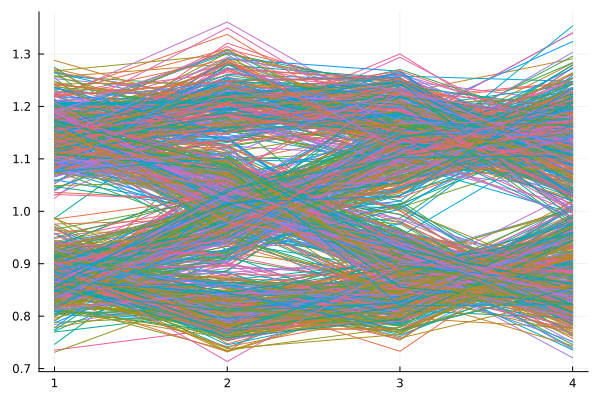

In [19]:
# Display the results
@printf "Generated channel vector h:\n%s\n" h[1:4,:]; @show typeof(h), size(h), sizeof(h);

@printf "First 10 samples of the transmitted symbols a:\n%s\n" a₀[1:4]

@printf "First 10 received signal vectors y:\n%s\n" y[:, 1:4]

plot(abs2.(y)
    , legend = :none
)

In the following simulations, we shall take $SNR = 30 dB$ and we shall consider ***three*** SIR scenarios: $SIR = −5dB, 10dB, 100dB$ (dominating interferer, weak interferer, no interferer). For the angular scenario we take $\theta = 2\pi \frac{20^o}{360^o}$ and $\phi = 2\pi \frac{25^o}{360^o}$ (relatively closely spaced interferer!).

### **Part I:** ***IC in Known Channel Case***

We assume in this first part that $\mathbf{\hat{h}}[k] = \mathbf{h}$ is available (and hence $\mathbf{\hat{h}}^\perp[k] = \mathbf{h}^\perp$)

#### **&#x1F516;** **(&#x62;)** ___Matched Filter (MF) Output___

---

In a first instance we shall consider the simple unbiased Matched Filter output $\hat{a}[k] = \frac{1}{\|h\|^2} \mathbf{h}^H \mathbf{y}[k]$. The output SNR is determined as $SNR_{\text{MF}} = \frac{\sigma_a^2}{\sigma_{\widehat{a}}^2} = \frac{1}{\sigma_{\widehat{a}}^2}$ where $\sigma_{\widehat{a}}^2$ gets estimated as $\sigma_{\widehat{a}}^2 = \frac{1}{M} \displaystyle\sum_{k=1}^M |\tilde{a}[k]|^2$ with $\tilde{a}[k] = a[k] − \widehat{a}[k]$.

***Run your routine `signalgen.m` to generate $M = 10000$ samples of $y[k]$. Make an output constellation plot and compute the output SNR.***

The output constellation plot is a plot of $(x,y) = (\mathfrak{R} \, \widehat{a}[k],\mathfrak{I} \, \widehat{a}[k])$, the in-phase and in-quadrature components, in which the $M$ points get superimposed. If the reception is clear, you should be able to see the transmitted QPSK constellation for $a[k]$ clearly (with some noise clouds around each QPSK point). Note that the routine `signalgen.m` provides $h$ so you can compute the unbiased MF, and the transmitted symbols $a[k]$ so you can compute the error signal $\tilde{a}[k]$

#### **&#x1F516;** **(&#x63;)** ___NLMS ICMF Adaptation___

___

Consider now the ICMF in the figure with the MF $\mathbf{h}^H$ in the top branch replaced by an unbiased MF $\frac{1}{\|\mathbf{h}\|^2}\mathbf{h}^H$, and the blocking filter taken as $\mathbf{h}^{\perp H} = P_{\mathbf{h}}^\perp$. We shall be running the Normalized LMS (NLMS) algorithm to adapt the IC filter $\mathbf{f}$

$$
\begin{align}
\mathbf{\widehat{a}}[k] &= e[k] = d[k] - \mathbf{f}[k - 1] \, \mathbf{x}[k] \nonumber \\
& \quad \, \mathbf{f}[k] = \mathbf{f}[k - 1] + \frac{\bar{\mu}}{\|\mathbf{x}[k]\|^2} e[k] \, \mathbf{x}^H[k]
\end{align}
$$

where $\bar{\mu}$ is a normalized stepsize, $d[k] = \frac{1}{\|\mathbf{h}\|^2}\mathbf{h}^H \mathbf{y}[k]$ and $\mathbf{x}[k] = \mathbf{y}_2[k] = P_{\mathbf{h}}^\perp \mathbf{y}[k] = \mathbf{y}[k] - \mathbf{h} \, d[k]$. We shall be running the NLMS algorithm with $\bar{\mu} = 0.01$ (or even $\bar{\mu} = 0.001$), which is not too small, to be able to track non-stationarities which might occur in practice (we need $\bar{\mu} \in (0, 2)$ for the NLMS algorithm to converge to a steay-state, and $\bar{\mu} = 1$ leads to fastest convergence), but $\bar{\mu} > 0$ prevents the filter from converging to the optimal filter and leads to a noisy steady-state in which the filter coefficient variance is proportional to $\bar{\mu}$. The NLMS algorithm starts at $k = 1$ and gets initialized with $\mathbf{f}[0] = 0_{1 × 4} = [0 \, 0 \, 0 \, 0]$.

***Use signalgen.m to generate $M = 11000$ samples of $\mathbf{y}[k]$. Run the NLMS algorithm for the $M$ samples. Make a plot of the signal $20 \log_{10} |e[k]|$ and check whether NLMS has converged within the first 1000 samples. Make an output constellation plot (of the points $(\mathfrak{R} \, \widehat{a}[k],\mathfrak{I} \, \widehat{a}[k])$ ) and compute the output SNR, both using the last 10000 samples only (steady-state only, the first 1000 transient samples get skipped). Provide the piece of Matlab code that you used to generate these results.***

#### **&#x1F516;** **(&#x64;)** ___ICMF with Signal Compensated NLMS Adaptation___

---

We shall now consider running two ICMF circuits in parallel. One is working on the compensated signal $\mathbf{y}^\prime[k] = \mathbf{y}[k] − \mathbf{h} \, a[k]$ and hence uses $d^\prime[k] = \frac{1}{\|\mathbf{h}\|^2} \mathbf{h}^H \mathbf{y}^\prime[k] = \frac{1}{\|\mathbf{h}\|^2} \mathbf{h}^H ( \mathbf{y}[k]− \mathbf{h} \, a[k]) = \frac{1}{\|\mathbf{h}\|^2} \mathbf{h}^H \mathbf{y}^\prime[k] - a[k]$ and $\mathbf{x}^\prime[k] = \mathbf{y}^\prime[k] - \mathbf{h} \, d^\prime[k] = P_{\mathbf{h}}^\perp \mathbf{y}^\prime[k] = P_{\mathbf{h}}^\perp \mathbf{y}[k] = \mathbf{x}[k]$. This first ICMF provides the time-varying $\mathbf{f}[k]$ which is used in the second ICMF, which is the usual ICMF working directly on $\mathbf{y}[k]$, to output $\hat{a}[k] = d[k] − \mathbf{f}[k − 1] \, \mathbf{x}[k]$.

***Apart from the fact that now two ICMFs need to be run in parallel, repeat the questions in $(c)$***.

#### **&#x1F516;** **(&#x65;)** ___ICMF with DD Signal Compensated NLMS Adaptation___

---

The signal compensation considered above is not realistic since the transmitted sequence $a[k]$ needs to be known. The signal compensation considered above is not realistic since the transmitted sequence $a[k]$ needs to be known. Consider now a more realistic Decision Directed (DD) version in which $a[k]$ gets replaced by hard decisions $\widehat{\widehat{a}}[k] = sign(\mathfrak{R} \, \widehat{a}[k],\mathfrak{I} \, \widehat{a}[k])$ (real and imaginary parts) where $\widehat{a}[k] = d[k] − \mathbf{f}[k−1] \, \mathbf{x}[k]$ as usual. The signal compensation now becomes $\mathbf{y}'[k] = \mathbf{y}[k] − \mathbf{h} \, \widehat{\widehat{a}}[k]$.

***With this more realistic signal compensation, repeat the questions in $(d)$***. The following relations may be helpful:

$
\begin{align*}
k − 1 \to k \\
&d[k] = \frac{1}{\|\mathbf{h}\|^2}\mathbf{h}^H \mathbf{y}[k] , \mathbf{x}[k] = \mathbf{y}[k] - \mathbf{h} \, d[k] \qquad \qquad \qquad \qquad \quad \\ICMF2: & \, \widehat{a}[k] = d[k] − \mathbf{f}[k − 1] \, \mathbf{x}[k] , \, \widehat{\widehat{a}}[k] = sign(\mathfrak{R} \, \widehat{a}[k]) + j \, sign(\mathfrak{I} \, \widehat{a}[k]) \\
&d^\prime[k]=d[k]− \widehat{\widehat{a}}[k], \, \mathbf{x}^\prime[k]= \mathbf{x}[k] \qquad \qquad \qquad \qquad \qquad \qquad \quad \tag{6} \\
ICMF1: & \, e[k] = d^\prime[k] − \mathbf{f}[k − 1] \, \mathbf{x}[k] \qquad \qquad \qquad \qquad \quad \qquad \qquad \qquad \\
&\mathbf{f}[k] = \mathbf{f}[k − 1] + \frac{\bar{\mu}}{\|\mathbf{x}[k]\|^2} e[k] \mathbf{x}^H[k] \qquad \qquad \qquad \qquad \qquad \quad
\end{align*}
$

### **Part II:** ***Channel Estimation***

So far the channel has been assumed known in the receiver, which is not realistic. We shall focus on the channel estimation now.

#### **&#x1F516;** **(&#x66;)** ___Training Based LMS Channel Adaptation___

---

Consider adapting the channel with the following LMS algorithm

$$
\begin{align*}
\mathbf{w}[k] &= \mathbf{y}[k] − \mathbf{h}[k−1] a[k] \\
\\
\mathbf{h}[k] &= \mathbf{h}[k−1] + \nu \, \mathbf{w}[k] a^∗[k]
\end{align*}
$$

which gets initialized with $\mathbf{h}[0] = 0_{4×1}$. Note that in this case the LMS and NLMS algorithms are the same since $|a[k]| = 1$. We shall use the stepsize $\nu = 0.1$.

***Use `signalgen.m` to generate $M = 11000$ samples of $y[k]$. Run the LMS algorithm to estimate the channel for $M$ samples. Make a plot of the signal $10 \log_{10} \frac{\|\mathbf{h} − \mathbf{h}[k]\|^2}{\|\mathbf{h}\|^2}$ and check whether LMS has converged within the first 1000 samples. Compute the relative channel estimation error $10 \log_{10} \Big( \frac{1}{10000 \|\mathbf{h}\|^2} \displaystyle\sum_{k=1001}^{11000} \|\mathbf{h} − \mathbf{h}[k]\|^2 \Big).$***

***Provide the piece of Matlab code that you used to generate these results.***

#### **&#x1F516;** **(&#x67;)** ___MUSIC Algorithm Based Channel Estimation Improvement___

---

We can obtain an improved channel estimate by exploiting the parametric form of the array response: indeed only the parameter $\theta$ is unknown in $\mathbf{h}$. So we can apply an instantaneous form of the MUSIC algorithm as follows. With $\alpha = 2\pi \frac{d}{\lambda} \sin(\theta)$, we have in principle

$$
\begin{align*}
0 &= \Bigg\|
    { 
    \begin{bmatrix}
       1 & -e^{-j\alpha} & 0             & 0              \\[0.3em]
       0 & 1             & -e^{-j\alpha} & 0              \\[0.3em]
       0 & 0             & 1             & -e^{-j\alpha}
     \end{bmatrix}
     \begin{bmatrix}
       1 \\
       e^{j\alpha}  \\[0.3em]
       e^{j2\alpha} \\[0.3em]
       e^{j3\alpha} \\[0.3em]
     \end{bmatrix}
     }
    \Bigg\|^2
  = \Biggl\|
    { 
    \begin{bmatrix}
       1 & -e^{-j\alpha} & 0             & 0              \\[0.3em]
       0 & 1             & -e^{-j\alpha} & 0              \\[0.3em]
       0 & 0             & 1             & -e^{-j\alpha}
     \end{bmatrix}
     \mathbf{a}(\theta)
     }
    \Biggr\|^2 \\
  &= \Biggl\|
    { 
    \begin{bmatrix}
       1 & -e^{-j\alpha} & 0             & 0              \\[0.3em]
       0 & 1             & -e^{-j\alpha} & 0              \\[0.3em]
       0 & 0             & 1             & -e^{-j\alpha}
     \end{bmatrix}
     \mathbf{h}
     }
    \Biggr\|^2
  = \Bigg\|
    { 
    \begin{bmatrix}
       1 & -e^{-j\alpha} & 0             & 0              \\[0.3em]
       0 & 1             & -e^{-j\alpha} & 0              \\[0.3em]
       0 & 0             & 1             & -e^{-j\alpha}
     \end{bmatrix}
     \begin{bmatrix}
       h_1 \\
       h_2  \\[0.3em]
       h_3 \\[0.3em]
       h_4 \\[0.3em]
     \end{bmatrix}
     }
    \Bigg\|^2 \\
   &= \displaystyle\sum_{i=1}^3 | h_i − e^{−j\alpha} \, h_{i + 1} |^2 = \displaystyle\sum_{i=1}^3 (| h_i |^2 + \, | h_{i + 1} |^2) − 2\mathfrak{R}\{ e^{−j\alpha} \displaystyle\sum_{i=1}^3 h_i^∗ \, h_{i+1} \}
\end{align*}
$$

Now, with an estimated channel, due to unstructured estimation error, these expressions will
not be zero but positive (since they are a sum of squares). A reasonable estimate will be
obtained by minimizing these expressions w.r.t. α. From the last expression, it is clear that $\alpha$ should be chosen so as to maximize $\mathfrak{R}\{ e^{−j\alpha} \displaystyle\sum_{i=1}^3 h_i^∗ \, h_{i+1} \}$, hence

$$
\alpha = \pi \sin(\theta) = arg(\displaystyle\sum_{i=1}^3 h_i^∗ \, h_{i+1} ) = \gamma \quad \text{if} \displaystyle\sum_{i=1}^3 h_i^∗ \, h_{i+1} = \beta \, e^{j \gamma} ,
$$

where we used $d = \frac{\lambda}{2}$ , and from which we can find $\theta$ as $\theta = \arcsin(\alpha/\pi)$. By substituting $\mathbf{h}$ by its estimate $\mathbf{h}[k]$, we obtain $\hat{\theta}[k]$ and the improved channel estimate $\hat{\hat{h}}[k] = \mathbf{a}(\hat{\theta}[k])$.

***Use signalgen.m to generate M = 11000 samples of $y[k]$. Run the LMS algorithm to estimate the channel for M samples. At each time instant $k$, compute $\theta[k]$ and $\hat{\hat{h}}[k]$. Make a plot of the signal $10 \log_{10} \frac{\|\mathbf{h} − \mathbf{\hat{\hat{h}}}[k]\|^2}{\|\mathbf{h}\|^2}$ and check whether LMS has converged within the first 1000 samples. Compute the relative channel estimation error $10 \log_{10} \Big( \frac{1}{10000 \|\mathbf{h}\|^2} \displaystyle\sum_{k=1001}^{11000} \|\mathbf{h} − \mathbf{\hat{\hat{h}}}[k]\|^2 \Big).$***

***Provide the piece of Matlab code that you used to generate these results.***

### **Part III:** ***DD Channel Estimation with IC Based on Estimated Channel***

***(OPTIONAL)***

So far we have only considered training based channel estimation, using all data as training. Let’s now also consider DD channel estimation.

#### **&#x1F516;** **(&#x68;)** ___Plain ICMF___

---

***Use `signalgen.m` to generate M = 11000 samples of $y[k]$. Run the training based LMS algorithm to estimate the channel for 500 samples. For the rest of the M samples, run the LMS channel estimation algorithm with $a[k]$ replaced by $\hat{a}[k]$ provided in $(c)$ (so, run the ICMF also in parallel). Repeat the questions in $(c)$. Furthermore, make a plot of the signal $10 \log_{10} \frac{\|\mathbf{h} − \mathbf{h}[k]\|^2}{\|\mathbf{h}\|^2}$ and check whether
LMS has converged within the first 500 samples. Compute the relative channel estimation error $10 \log_{10} \Big( \frac{1}{10000 \|\mathbf{h}\|^2} \displaystyle\sum_{k=1001}^{11000} \|\mathbf{h} − \mathbf{h}[k]\|^2 \Big)$.***

***Provide the piece of Matlab code that you used to generate these results.***

#### **&#x1F516;** **(&#x69;)** ___Signal Compensated ICMF___

---

***Use `signalgen.m` to generate M = 11000 samples of $y[k]$. Run the training based LMS algorithm to estimate the channel for 500 samples. For the rest of the M samples, run the LMS channel estimation algorithm with $a[k]$ replaced by $\hat{a}[k]$ provided in $(e)$ (so, run the ICMF also in parallel). Repeat the questions in $(e)$. Furthermore, make a plot of the signal $10 \log_{10} \frac{\|\mathbf{h} − \mathbf{h}[k]\|^2}{\|\mathbf{h}\|^2}$ and check whether
LMS has converged within the first 500 samples. Compute the relative channel estimation error $10 \log_{10} \Big( \frac{1}{10000 \|\mathbf{h}\|^2} \displaystyle\sum_{k=1001}^{11000} \|\mathbf{h} − \mathbf{h}[k]\|^2 \Big)$.***

***Provide the piece of Matlab code that you used to generate these results.***